In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from functions import monte_carlo, estimate_mask, dice_assessment

### Direct integration without Monte-Carlo

In [4]:
# Load data
name = 'sequences-train/bag'
img_ref = io.imread(name+'-001.bmp')
mask_ref = io.imread(name+'-001.png')

n_images = 2
imgs = list()
masks = list()

for i in range(2, 2 + n_images):
    imgs.append(io.imread(name+'-%0*d.bmp'%(3, i)))
    masks.append(io.imread(name+'-%0*d.png'%(3, i)))

In [5]:
def get_masks_direct(img_ref, mask_ref, imgs, n_iter_mc, p_size, n_iter_pm, thr=100):
    n, m = img_ref.shape[0], img_ref.shape[1] # Dimension of the images/masks
    n_images = len(imgs)
    estimated_masks = np.zeros((n_images, n, m))
    for i in range(n_images):
        print(f"Mask estimation for {name+'-%0*d.bmp'%(3, i+2)}")
        f_monte_carlo = monte_carlo(imgs[i], img_ref, n_iter=n_iter_mc, p_size=p_size, pm_iter=n_iter_pm)
        for j in range(n_iter_mc):
            mask_i = estimate_mask(mask_ref, f_monte_carlo[j])
            estimated_masks[i] += mask_i
        estimated_masks[i] /= n_iter_mc
        estimated_masks[i][estimated_masks[i] < thr] = 0
    return estimated_masks

In [6]:
n_iter_mc = 1
p_size = 9
n_iter_pm = 5
estimated_masks_direct_no_mc = get_masks_direct(img_ref, mask_ref, imgs, n_iter_mc, p_size, n_iter_pm)

Mask estimation for sequences-train/bag-002.bmp
Mask estimation for sequences-train/bag-003.bmp


In [8]:
dices_direct_no_mc = [dice_assessment(masks[i], estimated_masks_direct_no_mc[i]) for i in range(n_images)]

### Direct integration with Monte-Carlo

In [12]:
n_iter_mc = 3
p_size = 9
n_iter_pm = 5
estimated_masks_direct_mc = get_masks_direct(img_ref, mask_ref, imgs, n_iter_mc, p_size, n_iter_pm)

Mask estimation for sequences-train/bag-002.bmp
Mask estimation for sequences-train/bag-003.bmp
Mask estimation for sequences-train/bag-004.bmp
Mask estimation for sequences-train/bag-005.bmp
Mask estimation for sequences-train/bag-006.bmp
Mask estimation for sequences-train/bag-007.bmp
Mask estimation for sequences-train/bag-008.bmp
Mask estimation for sequences-train/bag-009.bmp
Mask estimation for sequences-train/bag-010.bmp
Mask estimation for sequences-train/bag-011.bmp
Mask estimation for sequences-train/bag-012.bmp
Mask estimation for sequences-train/bag-013.bmp
Mask estimation for sequences-train/bag-014.bmp
Mask estimation for sequences-train/bag-015.bmp
Mask estimation for sequences-train/bag-016.bmp
Mask estimation for sequences-train/bag-017.bmp
Mask estimation for sequences-train/bag-018.bmp
Mask estimation for sequences-train/bag-019.bmp
Mask estimation for sequences-train/bag-020.bmp
Mask estimation for sequences-train/bag-021.bmp
Mask estimation for sequences-train/bag-

In [14]:
dices_direct_mc = [dice_assessment(masks[i], estimated_masks_direct_mc[i]) for i in range(n_images)]

### Sequential integration without Monte-Carlo

In [4]:
def get_masks_sequential(img_ref, mask_ref, imgs, n_iter_mc, p_size, n_iter_pm, thr=150):
    n, m = img_ref.shape[0], img_ref.shape[1] # Dimension of the images/masks
    n_images = len(imgs)
    estimated_masks = np.zeros((n_images, n, m))
    for i in range(n_images):
        print(f"Mask estimation for {name+'-%0*d.bmp'%(3, i+2)}")
        f_monte_carlo = monte_carlo(imgs[i], img_ref, n_iter=n_iter_mc, p_size=p_size, pm_iter=n_iter_pm)
        for j in range(n_iter_mc):
            mask_i = estimate_mask(mask_ref, f_monte_carlo[j,...])
            estimated_masks[i,...] += mask_i
        estimated_masks[i] /= n_iter_mc
        estimated_masks[i][estimated_masks[i] < thr] = 0
        img_ref = np.copy(imgs[i])
        mask_ref = np.copy(estimated_masks[i])
    return estimated_masks

In [18]:
n_iter_mc = 1
p_size = 9
n_iter_pm = 5
estimated_masks_sequential_no_mc = get_masks_sequential(img_ref, mask_ref, imgs, n_iter_mc, p_size, n_iter_pm)

Mask estimation for sequences-train/bag-002.bmp
Mask estimation for sequences-train/bag-003.bmp
Mask estimation for sequences-train/bag-004.bmp
Mask estimation for sequences-train/bag-005.bmp
Mask estimation for sequences-train/bag-006.bmp
Mask estimation for sequences-train/bag-007.bmp
Mask estimation for sequences-train/bag-008.bmp
Mask estimation for sequences-train/bag-009.bmp
Mask estimation for sequences-train/bag-010.bmp
Mask estimation for sequences-train/bag-011.bmp
Mask estimation for sequences-train/bag-012.bmp
Mask estimation for sequences-train/bag-013.bmp
Mask estimation for sequences-train/bag-014.bmp
Mask estimation for sequences-train/bag-015.bmp
Mask estimation for sequences-train/bag-016.bmp
Mask estimation for sequences-train/bag-017.bmp
Mask estimation for sequences-train/bag-018.bmp
Mask estimation for sequences-train/bag-019.bmp
Mask estimation for sequences-train/bag-020.bmp
Mask estimation for sequences-train/bag-021.bmp
Mask estimation for sequences-train/bag-

In [19]:
dices_sequential_no_mc = [dice_assessment(masks[i], estimated_masks_sequential_no_mc[i]) for i in range(n_images)]

### Sequential integration with Monte-Carlo

In [5]:
n_iter_mc = 3
p_size = 9
n_iter_pm = 5
estimated_masks_sequential_mc = get_masks_sequential(img_ref, mask_ref, imgs, n_iter_mc, p_size, n_iter_pm)

Mask estimation for sequences-train/bag-002.bmp
Mask estimation for sequences-train/bag-003.bmp
Mask estimation for sequences-train/bag-004.bmp
Mask estimation for sequences-train/bag-005.bmp
Mask estimation for sequences-train/bag-006.bmp
Mask estimation for sequences-train/bag-007.bmp
Mask estimation for sequences-train/bag-008.bmp
Mask estimation for sequences-train/bag-009.bmp
Mask estimation for sequences-train/bag-010.bmp
Mask estimation for sequences-train/bag-011.bmp


In [6]:
dices_sequential_mc = [dice_assessment(masks[i], estimated_masks_sequential_mc[i]) for i in range(n_images)]

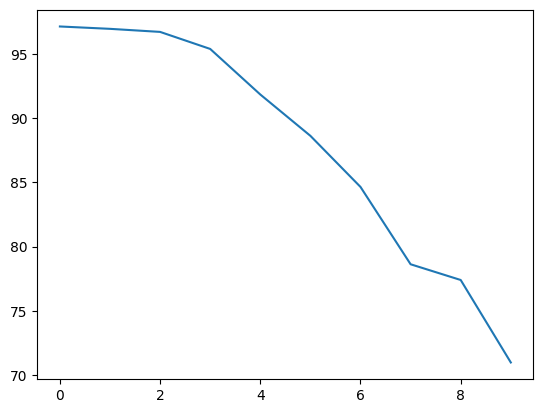

In [7]:
plt.plot(dices_sequential_mc)

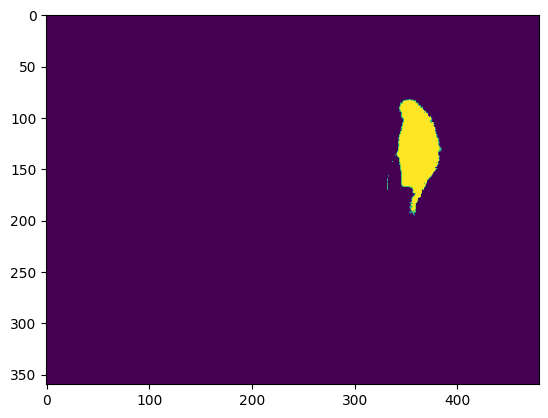

In [10]:
plt.imshow(estimated_masks_sequential_mc[9])
plt.show()

### Results

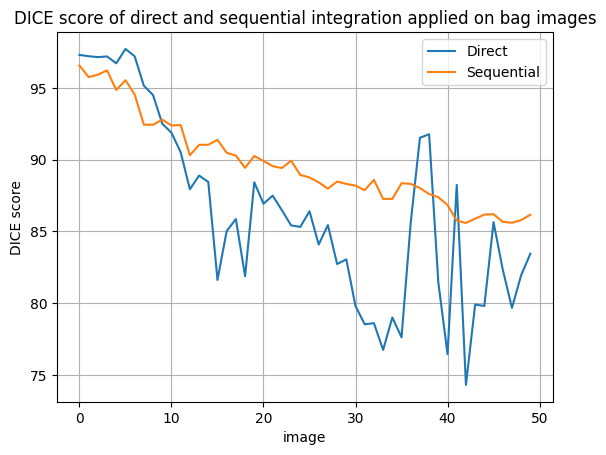

In [30]:
plt.plot(dices_direct_mc, label='Direct')
plt.plot(dices_sequential_no_mc, label='Sequential')
plt.legend()
plt.grid(True)
plt.xlabel('image')
plt.ylabel('DICE score')
plt.title('DICE score of direct and sequential integration applied on bag images')
plt.show()

image 0


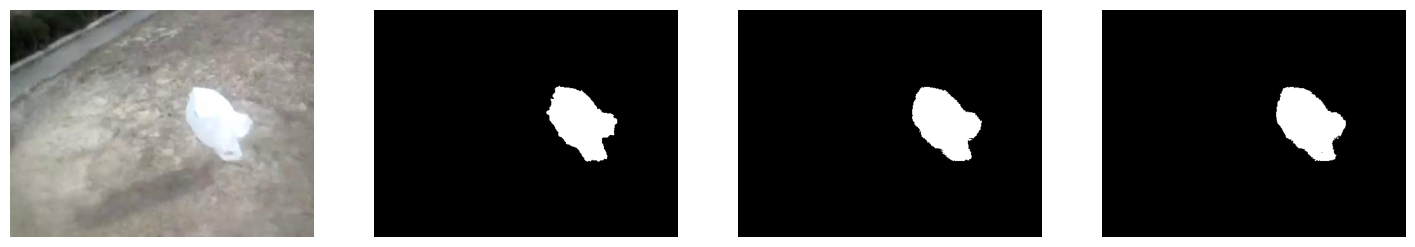

image 1


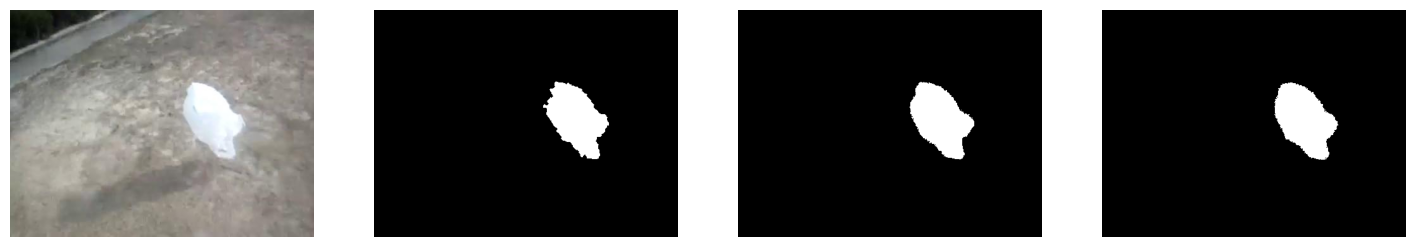

image 2


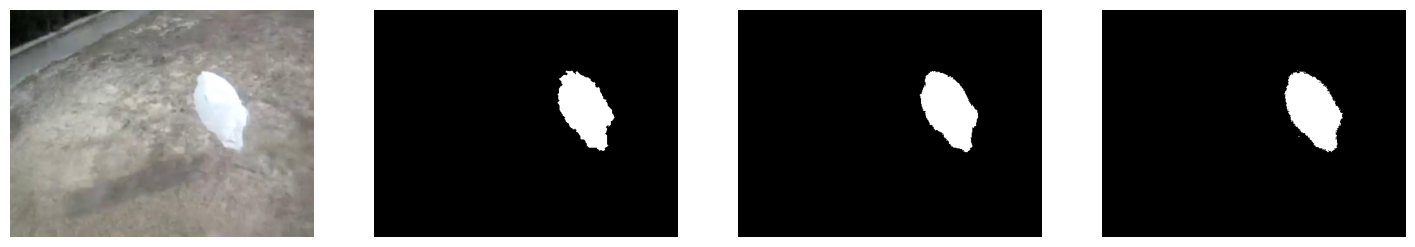

image 3


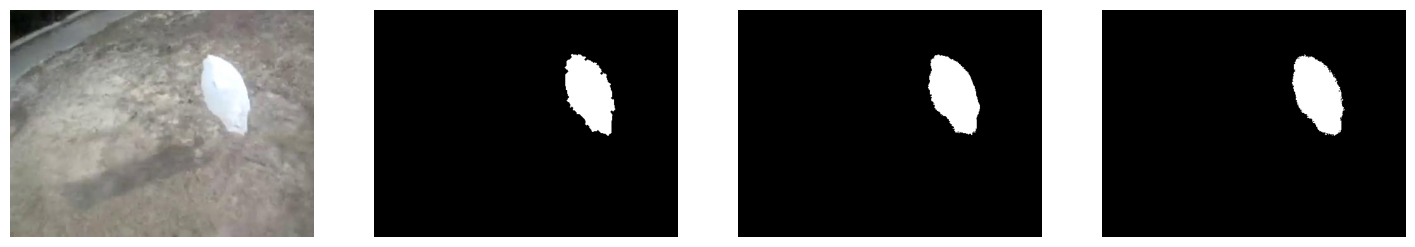

image 4


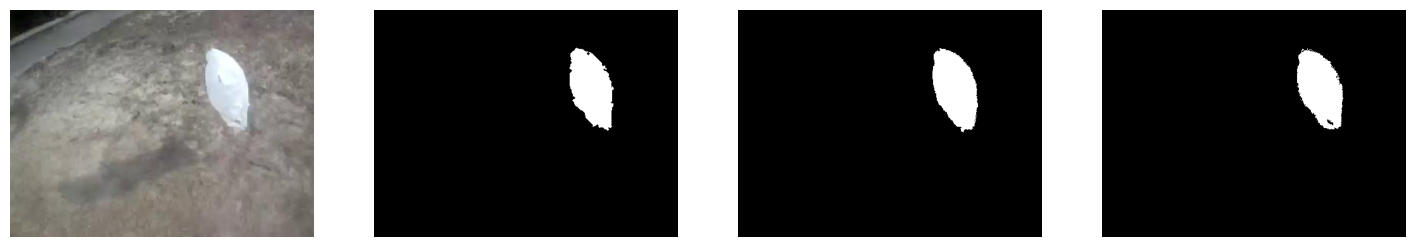

image 5


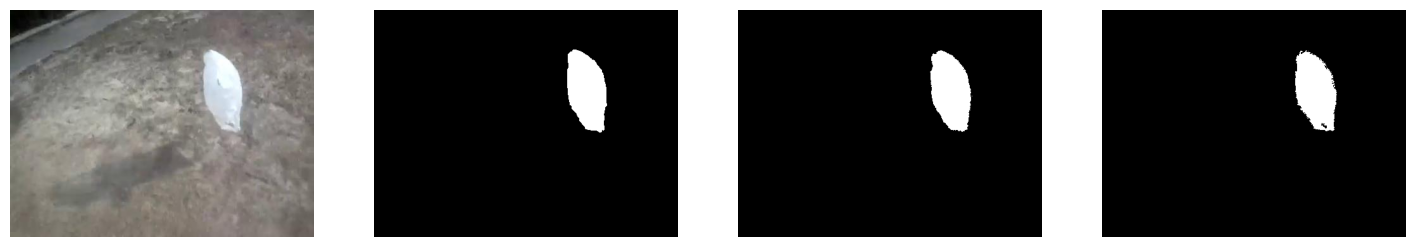

image 6


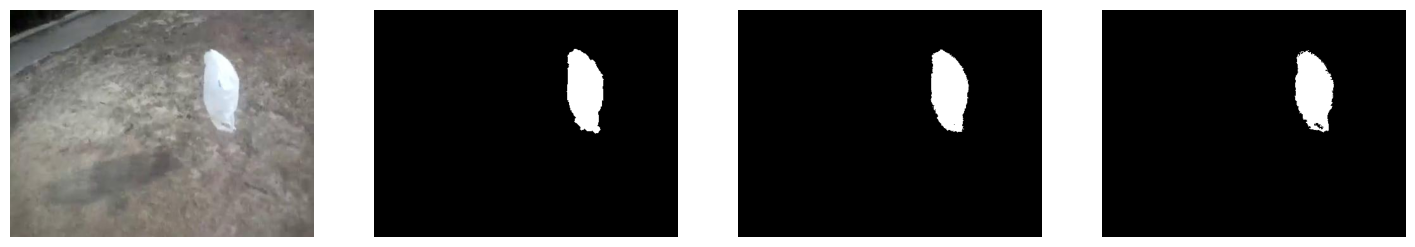

image 7


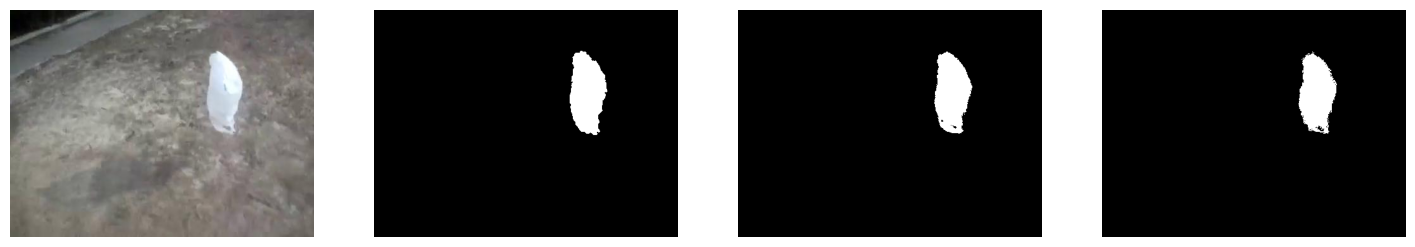

image 8


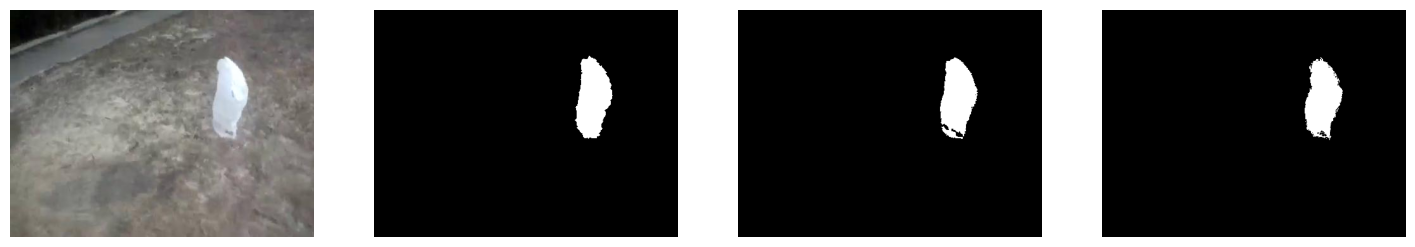

image 9


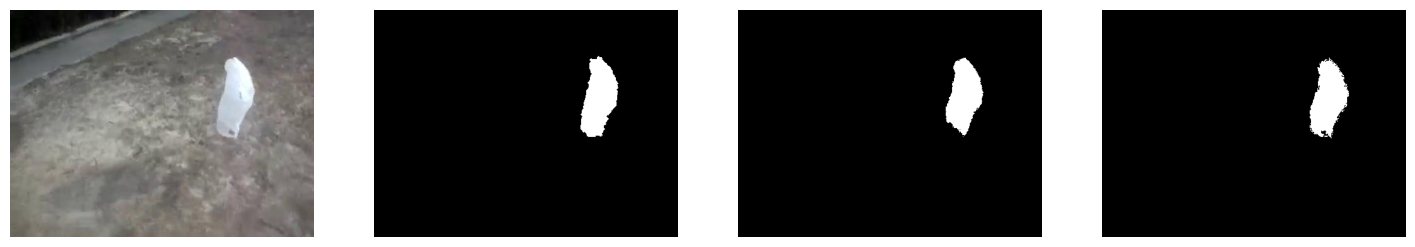

image 10


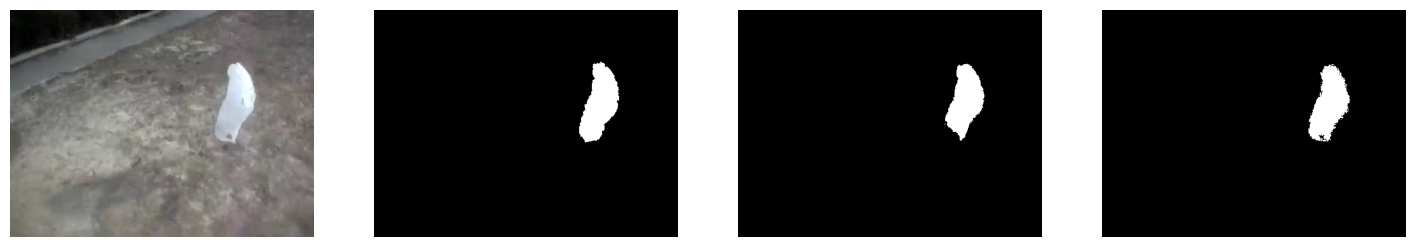

image 11


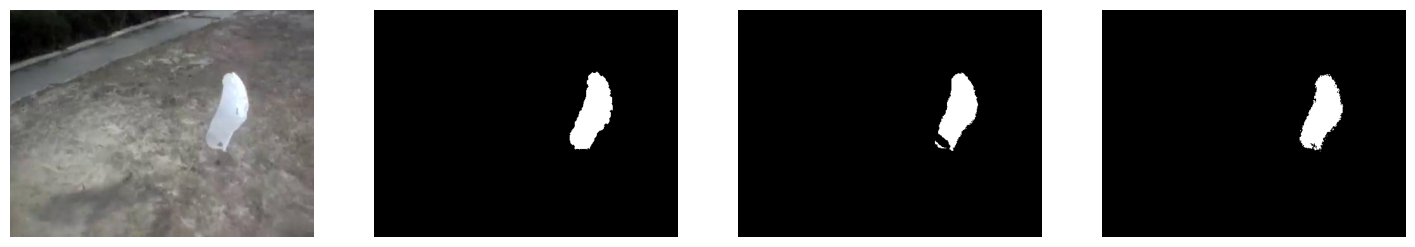

image 12


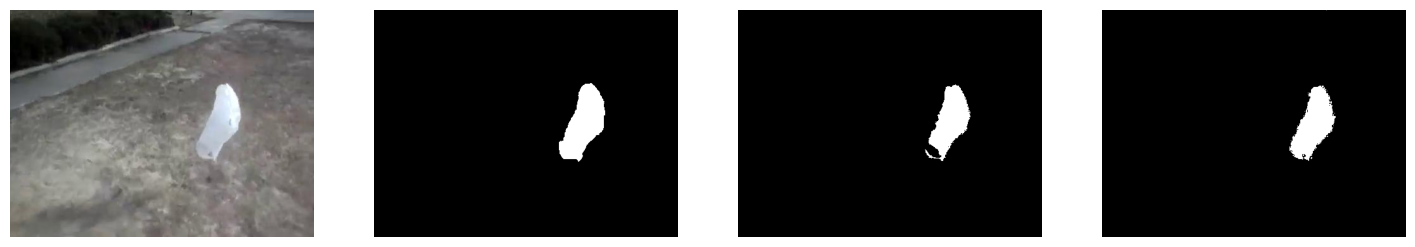

image 13


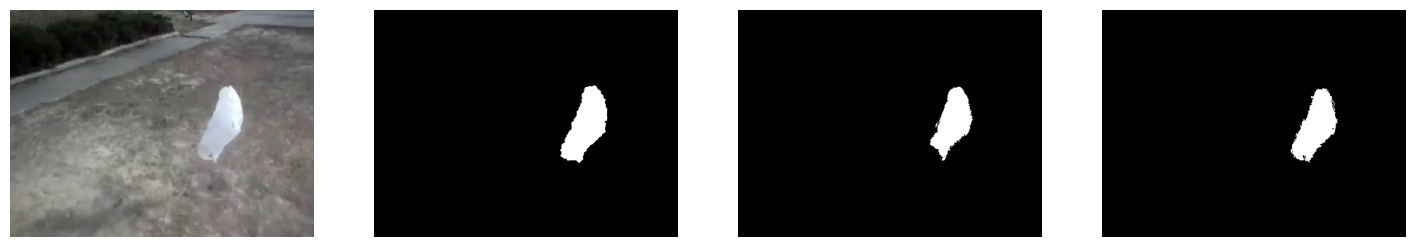

image 14


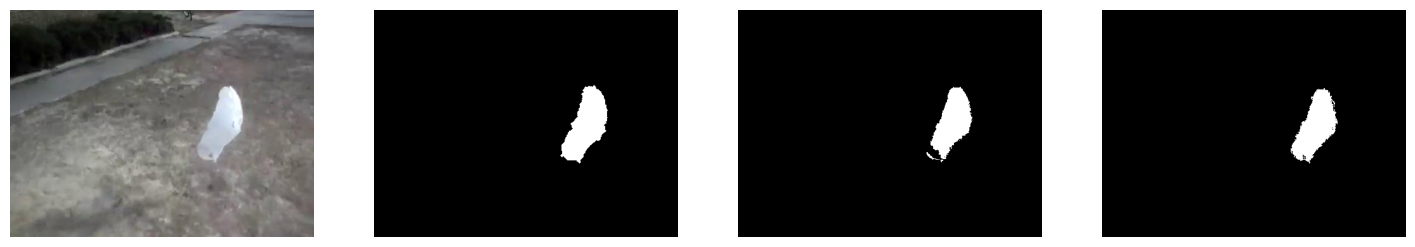

image 15


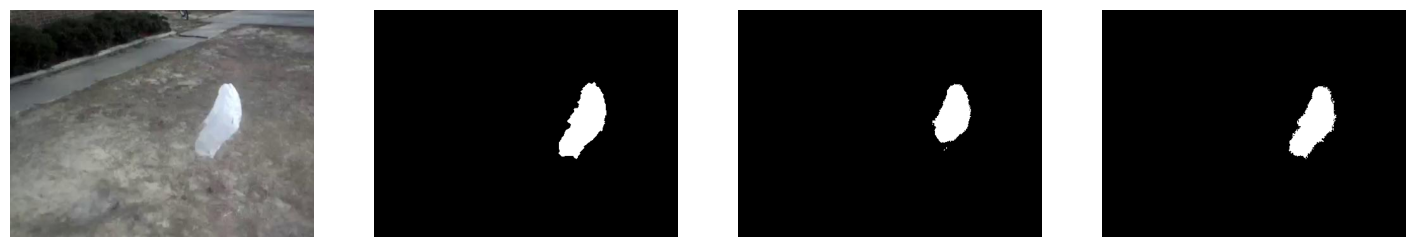

image 16


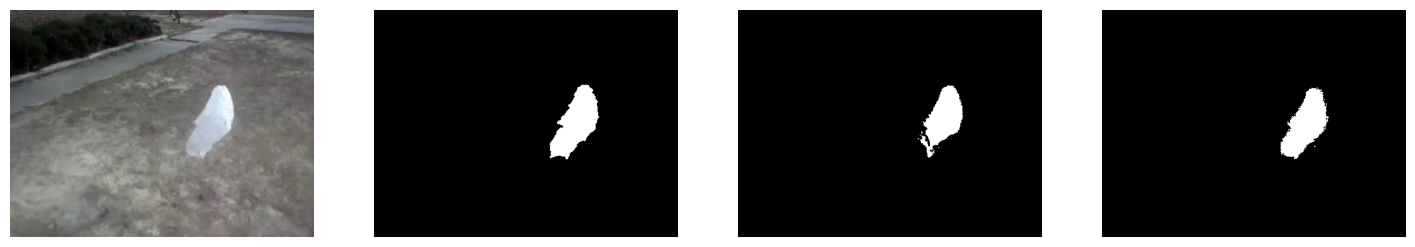

image 17


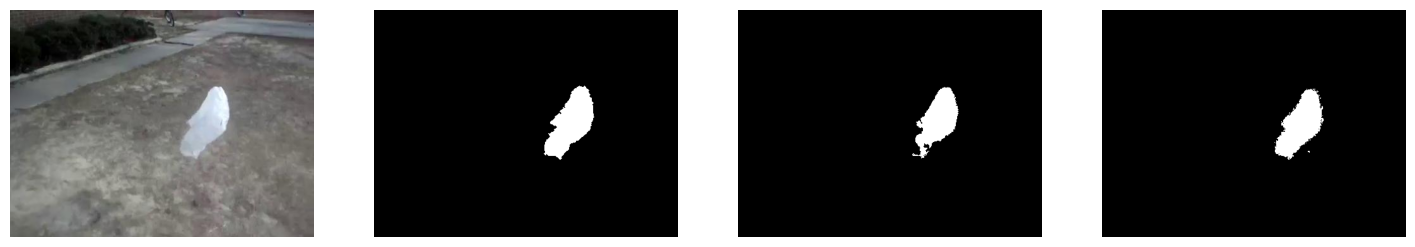

image 18


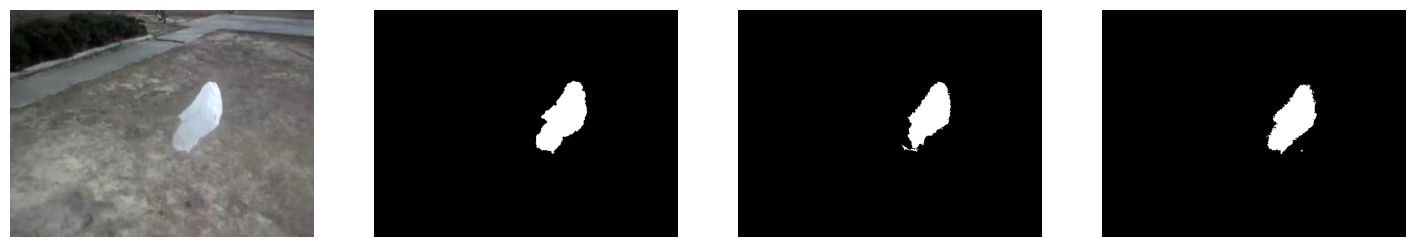

image 19


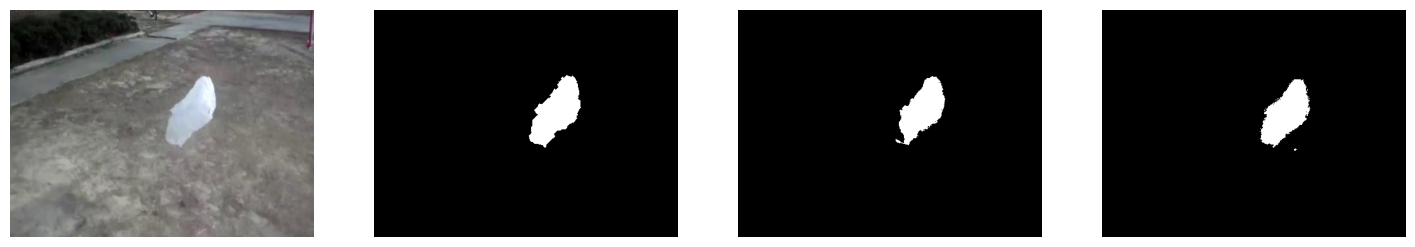

image 20


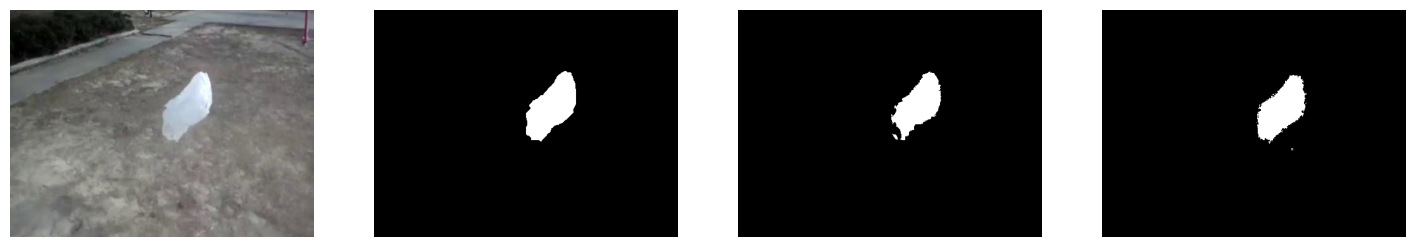

image 21


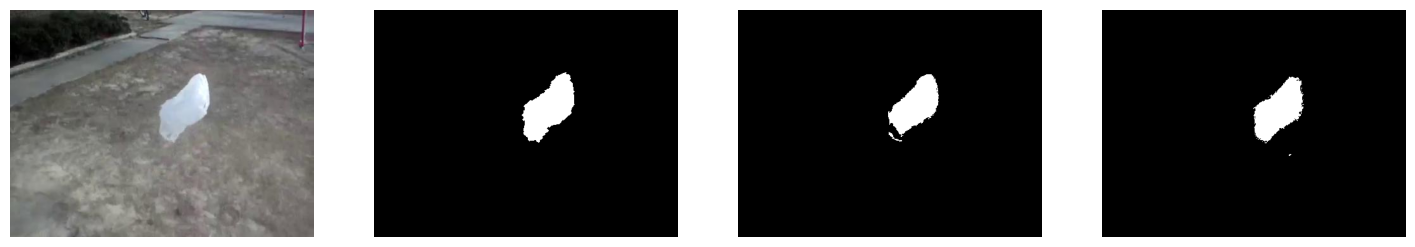

image 22


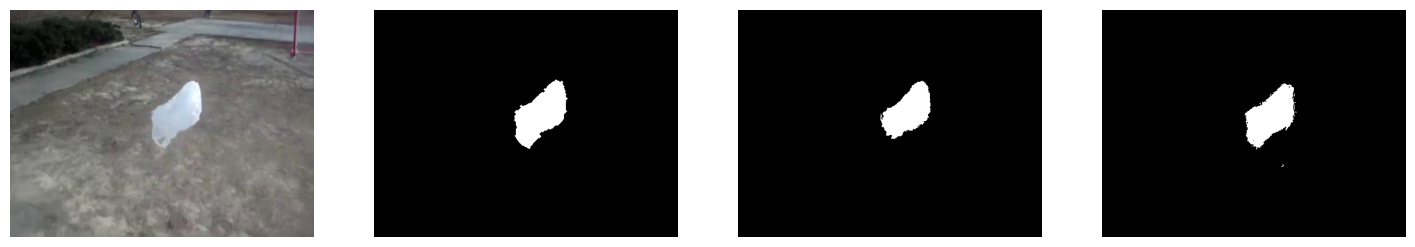

image 23


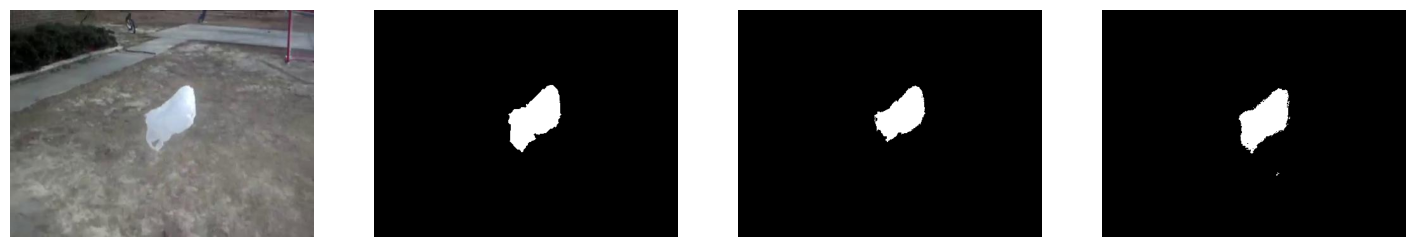

image 24


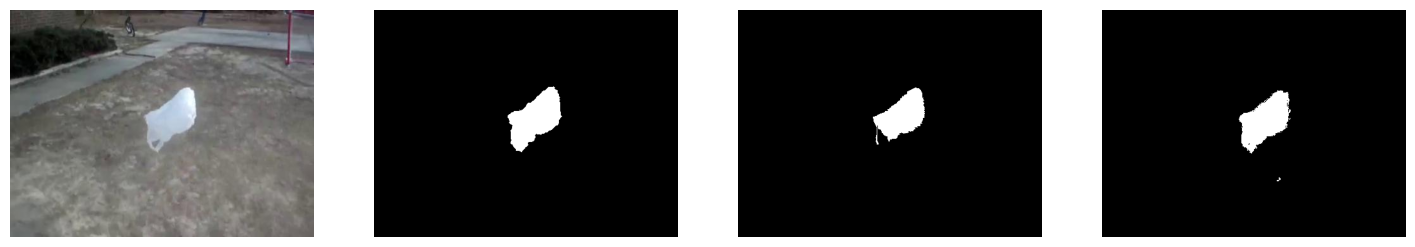

image 25


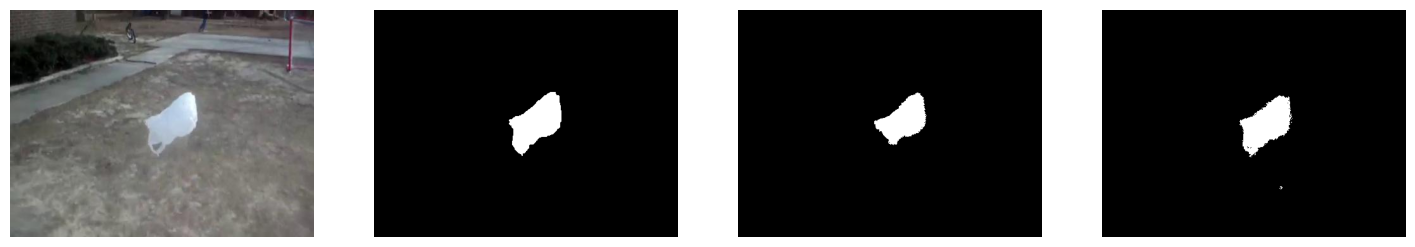

image 26


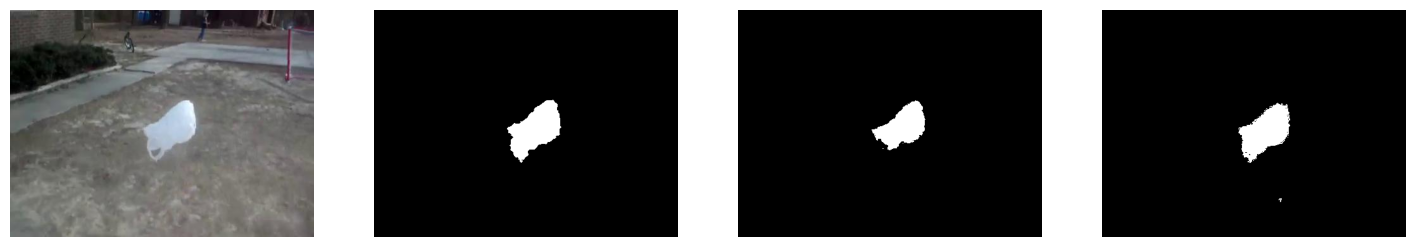

image 27


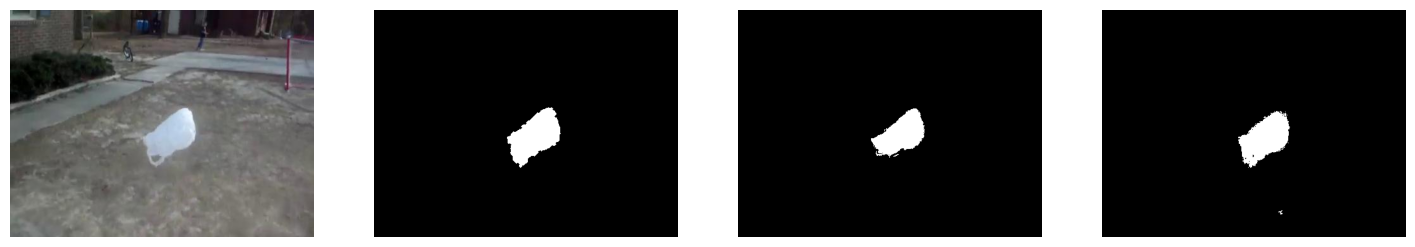

image 28


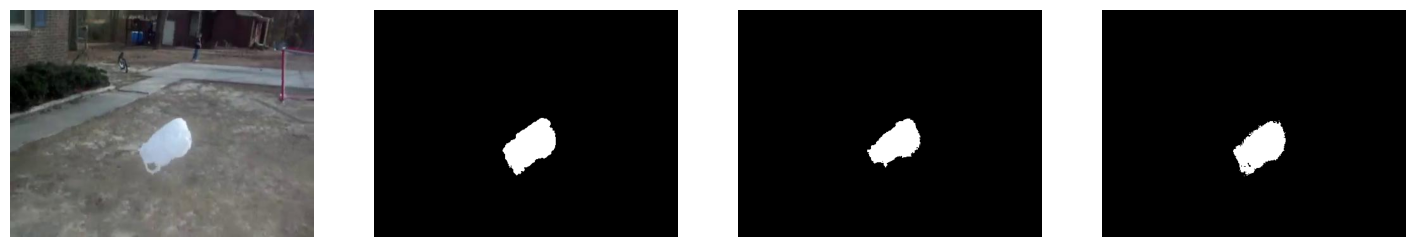

image 29


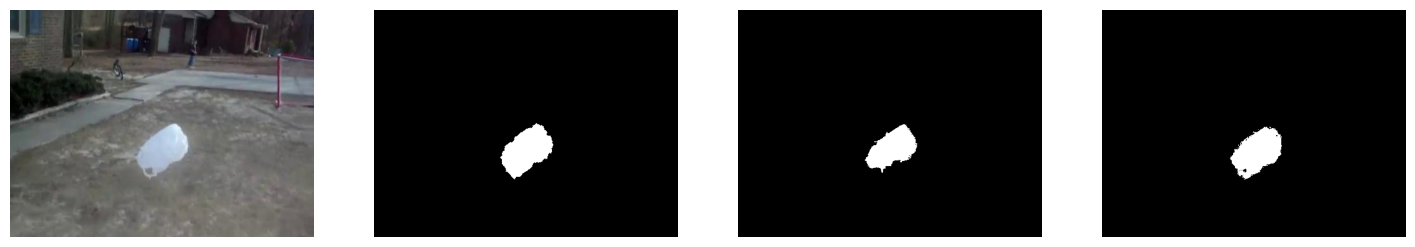

image 30


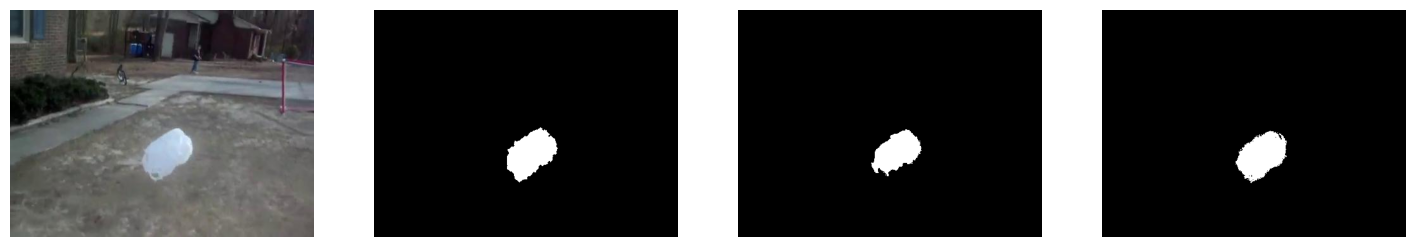

image 31


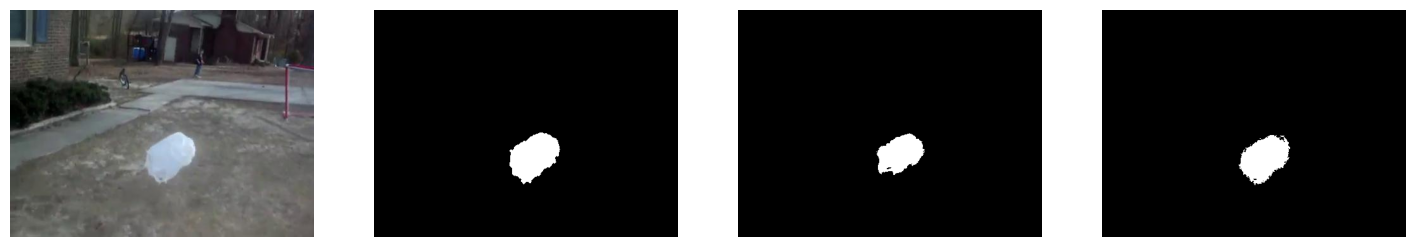

image 32


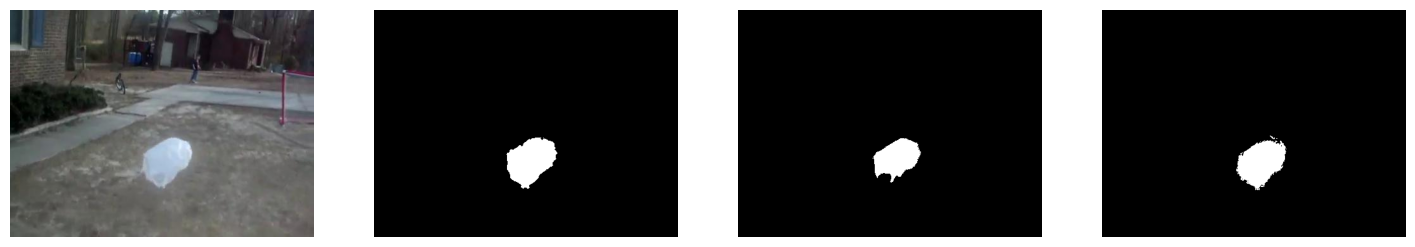

image 33


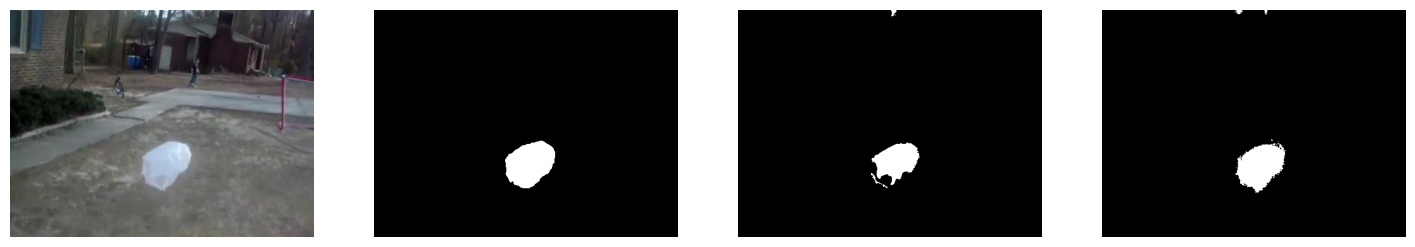

image 34


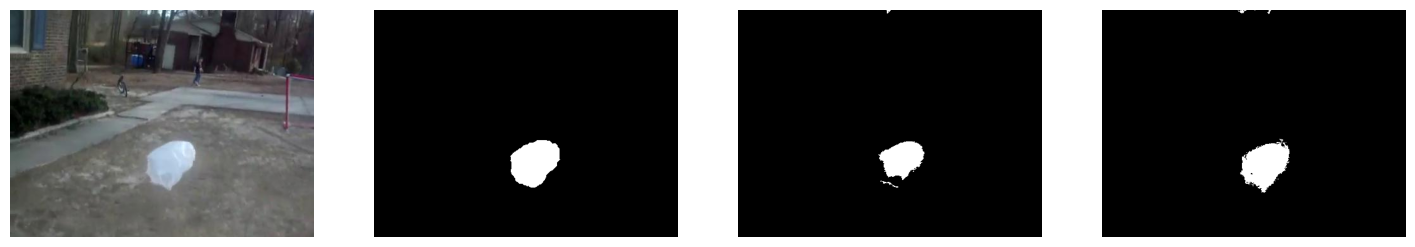

image 35


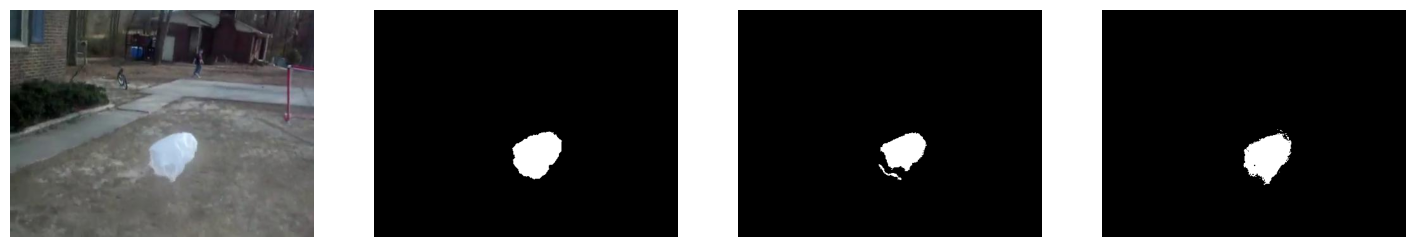

image 36


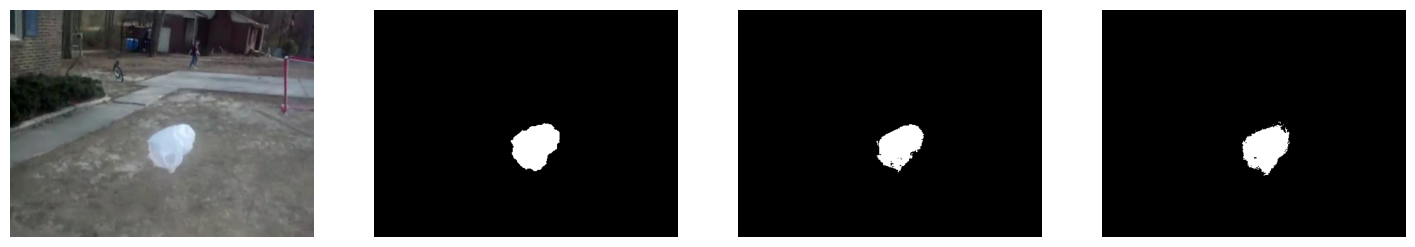

image 37


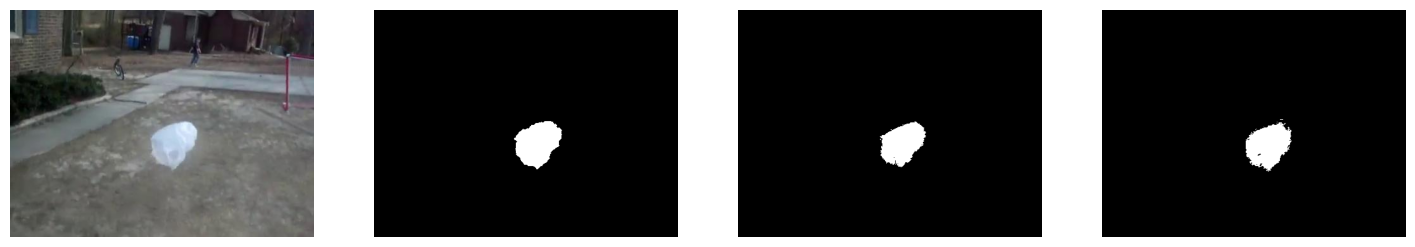

image 38


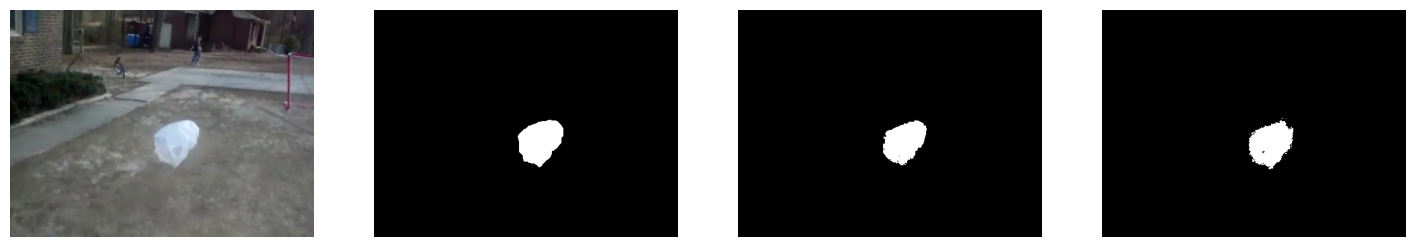

image 39


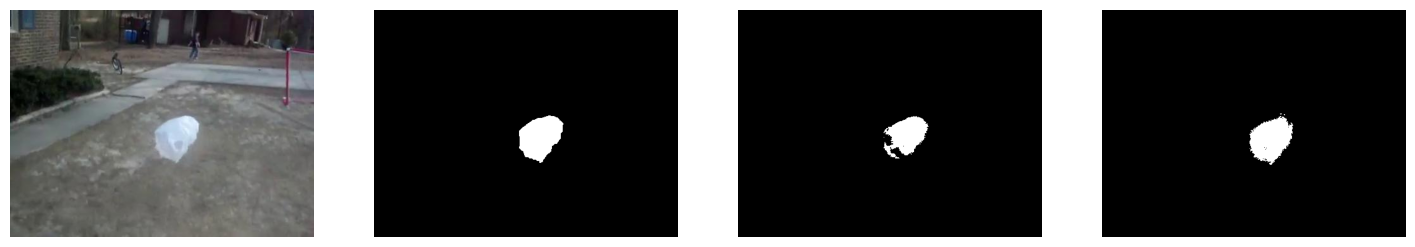

image 40


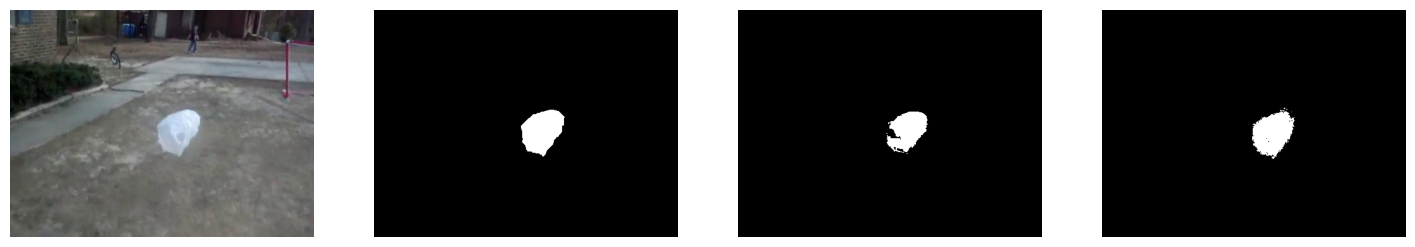

image 41


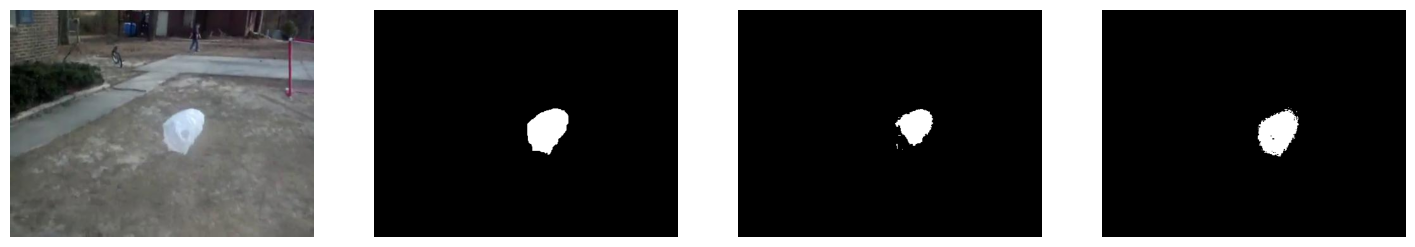

image 42


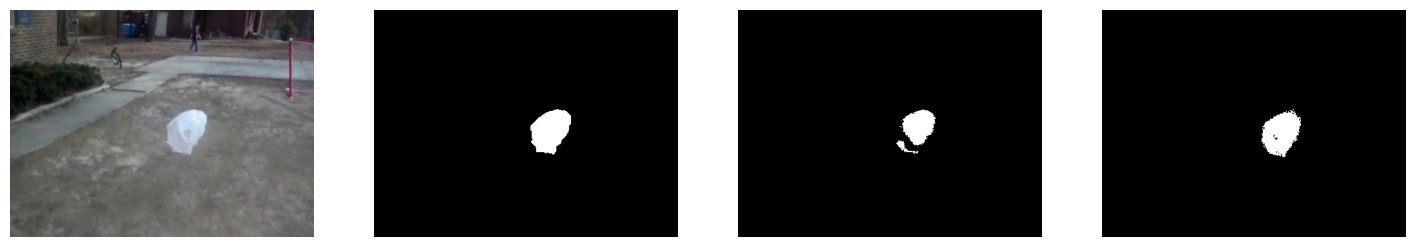

image 43


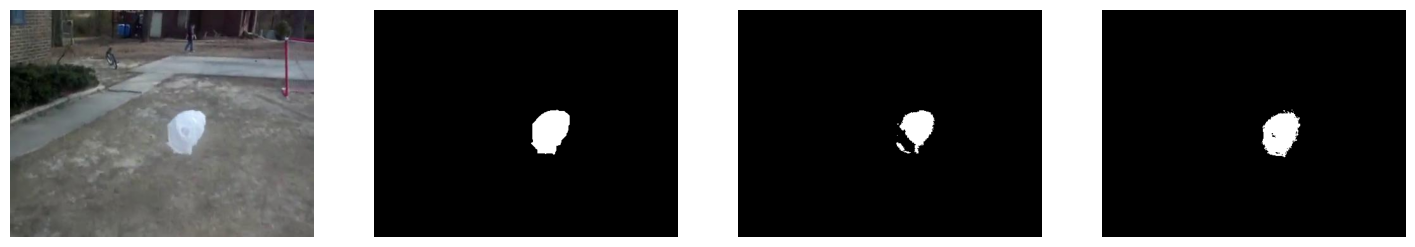

image 44


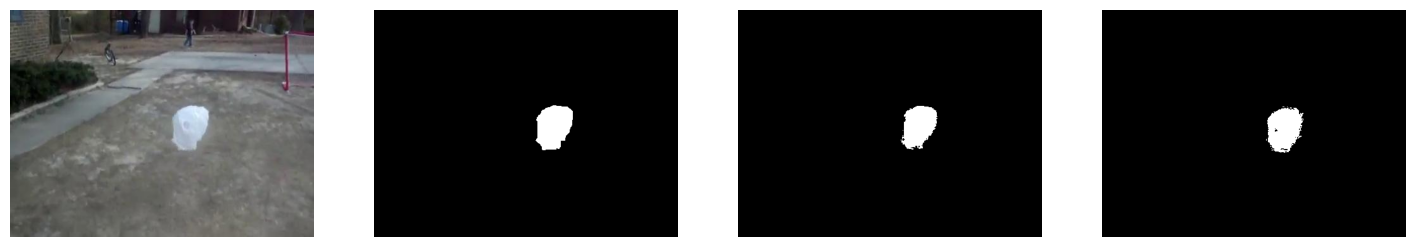

image 45


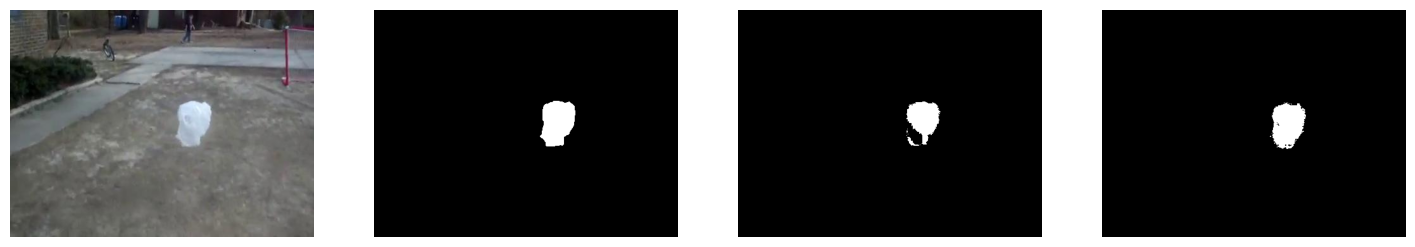

image 46


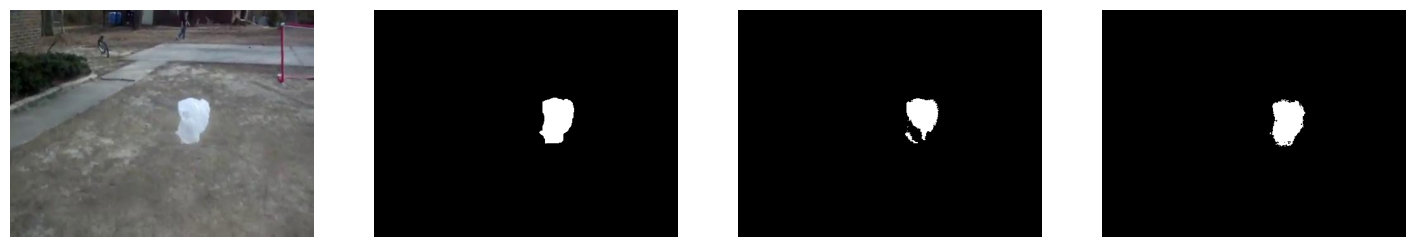

image 47


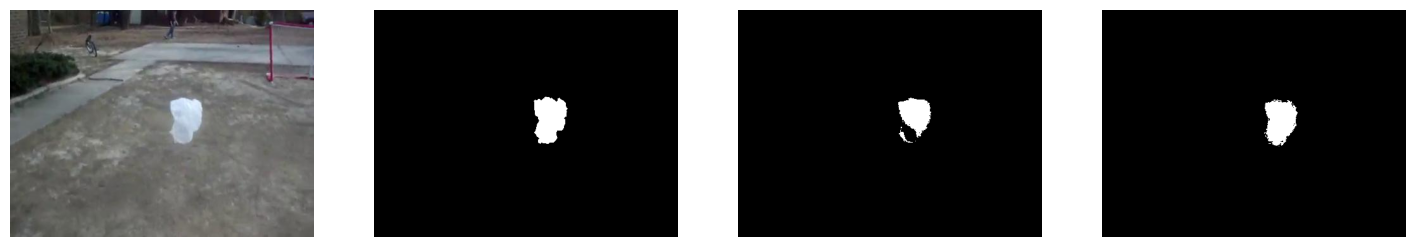

image 48


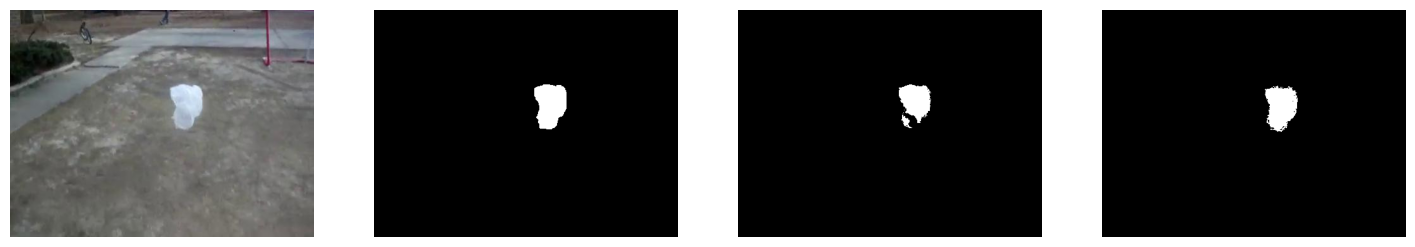

image 49


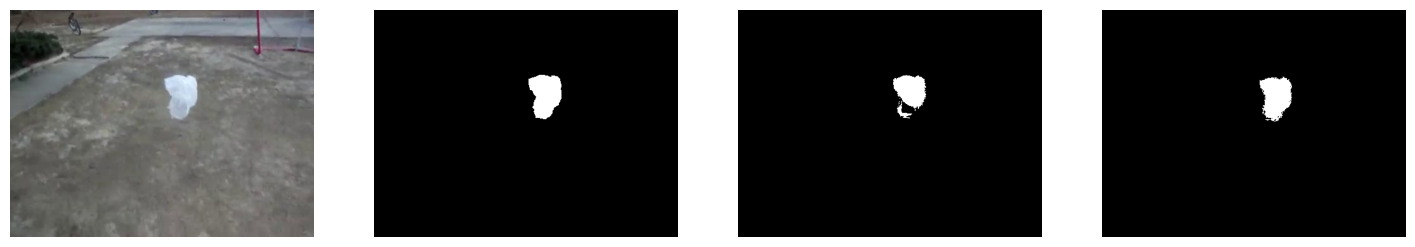

In [36]:
for i in range(50):
    print(f"image {i}")
    plt.figure(figsize=(18, 4))
    plt.subplot(141)
    plt.axis('off')
    plt.imshow(imgs[i])
    plt.subplot(142)
    plt.axis('off')
    plt.imshow(masks[i],cmap='gray')
    plt.subplot(143)
    plt.axis('off')
    plt.imshow(estimated_masks_direct_no_mc[i],cmap='gray')
    plt.subplot(144)
    plt.axis('off')
    plt.imshow(estimated_masks_sequential_no_mc[i],cmap='gray')
    plt.show()